In [ ]:
!pip install

In [1]:
pip install geopandas

     |████████████████████████████████| 994 kB 33.6 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 51.5 MB/s 


In [2]:
import pandas as pd

import geopandas as gpd
import pydot
import matplotlib.pyplot as plt

# **Historical DOB Permit Issuance**

In [4]:
boundaryDB= gpd.read_file("/content/drive/MyDrive/Rezoning/downtownBrooklyn boundary.shp")

In [5]:
housing =pd.read_csv('https://data.cityofnewyork.us/api/views/bty7-2jhb/rows.csv?accessType=DOWNLOAD')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,15,31,33,36,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
housing['YEAR']= pd.DatetimeIndex(housing['Issuance Date']).year  
housing_clean= housing.loc[(housing['YEAR']> 2003)]

In [8]:
housing_clean = housing_clean.loc[(housing_clean['BOROUGH'] == 'BROOKLYN')]
housing_clean.head()

,BOROUGH,BIN,Number,Street,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Postcode,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,Latitude,Longitude,Council District,Census Tract,BBL,NTA,YEAR
166178,BROOKLYN,3413222,53,BROADWAY,302170317,3,NB,NaN,2470,1,301,11249.0,2.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NONE,2012-08-20T00:00:00,2012-08-20T00:00:00,2013-08-20T00:00:00,2012-08-20T00:00:00,MARVIN,WASOFF,WASOFF PLBG & UTILITY CO,7183871400,MASTER PLUMBER,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-03T00:00:00,40.710614,-73.966581,34.0,549.0,3.024708e+09,North Side-South Side ...,2012
166865,BROOKLYN,3345177,3874,FLATLANDS AVENUE,302150240,2,A2,Y,7860,17,318,11234.0,2.0,NaN,NaN,NaN,MH,ISSUED,RENEWAL,EW,2,MH,NaN,NONE,2007-01-12T00:00:00,2007-01-12T00:00:00,2007-04-01T00:00:00,2006-06-16T00:00:00,SCOT,BINDER,WDF INC,2126961124,GENERAL CONTRACTOR,4331,Y,NaN,NaN,NaN,NaN,NaN,WDF INC,WDF INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-03T00:00:00,40.620326,-73.936743,45.0,650.0,3.078600e+09,Flatlands ...,2007
171781,BROOKLYN,3396853,107,THIRD STREET,310029509,2,NB,NaN,461,45,306,11231.0,2.0,NaN,NaN,NaN,PL,ISSUED,RENEWAL,PL,2,NaN,NaN,NONE,2009-06-26T00:00:00,2009-06-26T00:00:00,2010-06-26T00:00:00,2008-06-26T00:00:00,ERNEST,LEIBY,STARLITE PLBG & HTG CORP TING,7182566100,MASTER PLUMBER,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-03T00:00:00,40.677226,-73.992433,39.0,77.0,3.004618e+09,Carroll Gardens-Columbia Street-Red Hook ...,2009
171905,BROOKLYN,3332013,3915,1 AVENUE,301980382,2,DM,NaN,706,24,307,11232.0,2.0,NaN,NaN,NaN,EQ,ISSUED,INITIAL,EQ,1,SH,NaN,NONE,2005-12-02T00:00:00,2005-12-02T00:00:00,2005-12-31T00:00:00,2005-12-02T00:00:00,STEVE,CAPONE,LEXUS CONST,3477235371,GENERAL CONTRACTOR,30635,Y,NaN,NaN,NaN,NaN,NaN,LEXUS CONST,LEXUS CONST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-03T00:00:00,40.656480,-74.012863,38.0,18.0,3.007060e+09,Sunset Park West ...,2005
171973,BROOKLYN,3397391,34,NORTH 7 STREET,302314154,2,A2,Y,2324,1,301,11249.0,2.0,NaN,NaN,NaN,OT,ISSUED,INITIAL,EW,1,OT,NaN,NONE,2007-04-17T00:00:00,2007-04-17T00:00:00,2007-11-01T00:00:00,2007-04-17T00:00:00,STUART,MORRIS,LEVINE BLDRS,7182247147,GENERAL CONTRACTOR,1248,Y,NaN,NaN,NaN,NaN,NaN,LEVINE BLDRS,LEVINE BLDRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-03T00:00:00,40.720527,-73.962056,33.0,555.0,3.023248e+09,North Side-South Side ...,2007


In [33]:
select=['Street','Job Type','Issuance Date',
      'Community Board', 'Postcode', 'Bldg Type',
       'Residential', 'Special District 1', 'Special District 2', 'Latitude', 'Longitude',
        'YEAR']
housing_clean = housing_clean[select]

In [34]:
(housing_clean['YEAR'] == 0).sum()

0

In [35]:
housing_clean= housing_clean.loc[((housing_clean['Postcode']==11201) |(housing_clean['Postcode']==11217))]

In [36]:
housing_clean.to_csv('/content/drive/MyDrive/Rezoning/DOB_DB.csv')

In [37]:
housing_clean.loc[(housing_clean['YEAR']==2013)].sort_values(by=['Issuance Date'])

,Street,Job Type,Issuance Date,Community Board,Postcode,Bldg Type,Residential,Special District 1,Special District 2,Latitude,Longitude,YEAR
627494,FULTON STREET,A2,2013-01-02T00:00:00,302,11217.0,2.0,NaN,NaN,NaN,40.688192,-73.979108,2013
626885,STATE STREET,A2,2013-01-02T00:00:00,302,11217.0,2.0,YES,DB,NaN,40.688070,-73.985721,2013
585564,FULTON STREET,A2,2013-01-02T00:00:00,302,11217.0,2.0,NaN,DB,NaN,40.688192,-73.979108,2013
595528,STATE STREET,A2,2013-01-02T00:00:00,302,11217.0,2.0,YES,DB,NaN,40.688048,-73.985663,2013
383760,FULTON STREET,A2,2013-01-02T00:00:00,302,11217.0,2.0,NaN,NaN,NaN,40.688192,-73.979108,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
336264,SOUTH PORTLAND AVE,A1,2013-04-24T00:00:00,302,11217.0,2.0,YES,NaN,NaN,40.686934,-73.974576,2013
541376,COLLEGE PLACE,A2,2013-04-24T00:00:00,302,11201.0,1.0,YES,LH-1,NaN,40.696417,-73.994389,2013
327539,FLATBUSH AVE,A2,2013-04-24T00:00:00,302,11217.0,2.0,NaN,DB,NaN,40.684975,-73.978135,2013
585057,MONTAGUE STREET,A2,2013-04-24T00:00:00,302,11201.0,2.0,YES,LH-1,NaN,40.694556,-73.993469,2013


In [38]:
DOB=housing_clean[['Bldg Type','Residential','Special District 1', 'Special District 2','YEAR','Postcode']].groupby(['YEAR','Postcode']).count()
DOB

Bldg Type  Residential  Special District 1  Special District 2
YEAR Postcode                                                                
2004 11201.0        1574          179                 104                   0
     11217.0         735          152                  13                   0
2005 11201.0        1758          169                  93                   0
     11217.0         779          167                  10                   0
2006 11201.0        1684          184                  88                   0
     11217.0         885          180                  10                   0
2007 11201.0        1850          208                 110                   0
     11217.0        1035          176                  11                   0
2008 11201.0        2161          726                 713                   0
     11217.0        1109          437                  79                   0
2009 11201.0        2024          899                 869                   1
     11217.0         942          491                 102                   0
2010 11201.0        2185          944                1137                   4
     11217.0        1088          561                 165                   0
2011 11201.0        2301         1066                1369                  10
     11217.0        1114          586                 247                   0
2012 11201.0        2547         1144                1497                   4
     11217.0        1248          675                 323                   0
2013 11201.0         800          375                 489                   1
     11217.0         392          215                 119                   0

In [39]:
DOB2=housing_clean[['Bldg Type','Residential','Special District 1', 'Special District 2','YEAR']].groupby(['YEAR']).count()
DOB2=DOB2.rename(columns={'Bldg Type':'Total'})
#DOB2= DOB2.reset_index
#DOB2 = DOB2.loc[DOB2['YEAR']>2013]
DOB2 = DOB2[:-1]
DOB2

,Total,Residential,Special District 1,Special District 2
YEAR,,,,
2004,2309,331,117,0
2005,2537,336,103,0
2006,2569,364,98,0
2007,2885,384,121,0
2008,3270,1163,792,0
2009,2966,1390,971,1
2010,3273,1505,1302,4
2011,3415,1652,1616,10
2012,3795,1819,1820,4


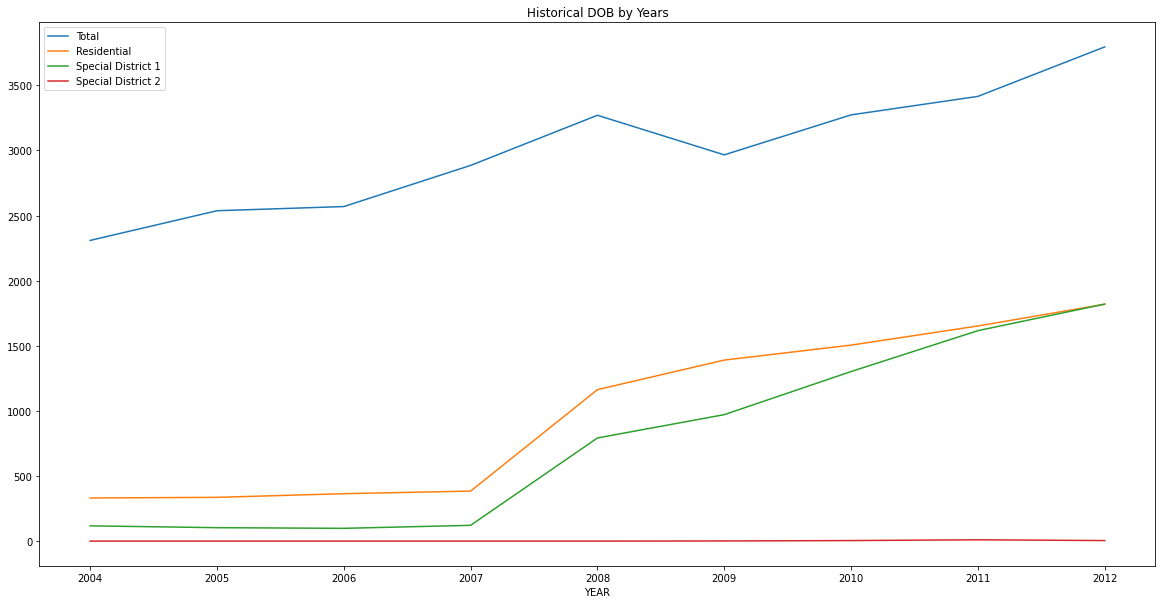

In [40]:
DOB2.plot(figsize = (20,10),title='Historical DOB by Years')

In [30]:
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import json
import urllib
import urllib.request

In [41]:
geometry = gpd.points_from_xy(housing_clean.Longitude, housing_clean.Latitude)
gdf_dt = gpd.GeoDataFrame(housing_clean, geometry=geometry).set_crs('EPSG:4326')
gdf_dt.head()

,Street,Job Type,Issuance Date,Community Board,Postcode,Bldg Type,Residential,Special District 1,Special District 2,Latitude,Longitude,YEAR,geometry
172055,JAY STREET,A2,2005-10-25T00:00:00,302,11201.0,2.0,NaN,NaN,NaN,40.698250,-73.986974,2005,POINT (-73.98697 40.69825)
173139,STERLING PLACE,NB,2009-03-02T00:00:00,306,11217.0,2.0,NaN,NaN,NaN,40.677297,-73.974215,2009,POINT (-73.97422 40.67730)
174001,HICKS STREET,A1,2010-07-13T00:00:00,303,11201.0,2.0,NaN,NaN,NaN,40.691093,-73.997804,2010,POINT (-73.99780 40.69109)
174097,REMSEN STREET,A2,2004-02-24T00:00:00,302,11201.0,1.0,NaN,NaN,NaN,40.693909,-73.993823,2004,POINT (-73.99382 40.69391)
175260,GOLD STREET,NB,2008-09-22T00:00:00,302,11201.0,2.0,NaN,NaN,NaN,40.696460,-73.983173,2008,POINT (-73.98317 40.69646)


In [45]:
def mapPlot (data,title2):
  fig, ax = plt.subplots(figsize = (10,10))
  plt.title(title2)
  data.plot(legend=True)
  boundaryDB.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

In [49]:
polys = gpd.read_file("/content/drive/MyDrive/Rezoning/clipped DB census block.shp")
points = gdf_dt
polys.head()

,CB2010,BoroCode,BoroName,CT2010,BCTCB2010,Shape_Leng,Shape_Area,geometry
0,0001,1,Manhattan,001501,10015010001,727.736215,16821.248368,"MULTIPOLYGON (((985621.874 195447.217, 985622...."
1,0003,1,Manhattan,000202,10002020003,989.253476,16174.099757,"MULTIPOLYGON (((989115.466 196325.123, 989116...."
2,2000,1,Manhattan,000500,10005002000,2050.807682,235331.418041,"POLYGON ((983761.550 191541.187, 983763.130 19..."
3,2000,1,Manhattan,000700,10007002000,1909.675940,211347.989369,"POLYGON ((984249.487 194108.678, 984246.983 19..."
4,2000,1,Manhattan,000900,10009002000,2004.090377,228592.138368,"POLYGON ((984563.543 193271.033, 984549.504 19..."


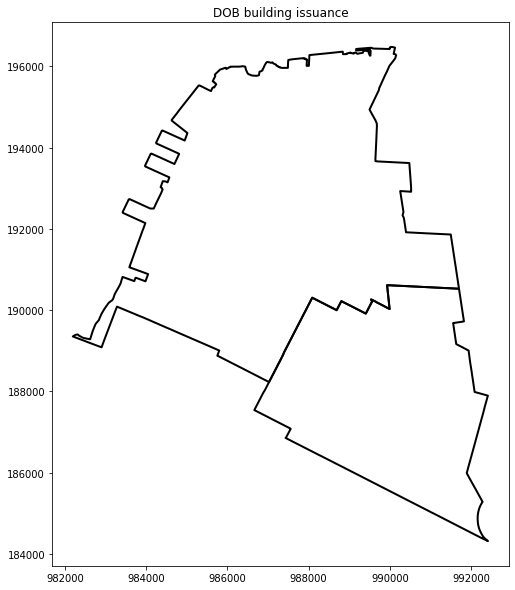

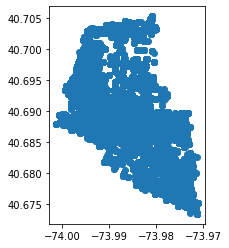

In [46]:
mapPlot(gdf_dt,'DOB building issuance')

# **311 noise data**

In [58]:
noise= pd.read_csv('https://data.cityofnewyork.us/api/views/p5f6-bkga/rows.csv?accessType=DOWNLOAD')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,17,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
noise_clean= noise.loc[(noise['Incident Zip']==11201) | (noise['Incident Zip']==11217)]
noise_clean= noise_clean.loc[noise_clean['City']=='BROOKLYN']
noise_clean['YEAR']= pd.DatetimeIndex(noise_clean['Created Date']).year


In [62]:
noise_clean=noise_clean.drop_duplicates(subset=['Unique Key'])

In [63]:
noise_clean.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location', 'YEAR'],
      dtype='object')

In [65]:
noise_clean.to_csv('/content/drive/MyDrive/Rezoning/311noise.csv')

In [70]:
Noise=noise_clean[['Incident Zip','YEAR']].groupby(['YEAR']).count()
Noise=Noise.rename(columns={'Incident Zip':'TotalNoiseComplain'})
Noise=Noise[:-1]
Noise

,TotalNoiseComplain
YEAR,
2010,3528
2011,3918
2012,3714
2013,4222
2014,5534
2015,6699
2016,7824
2017,8298
2018,8206


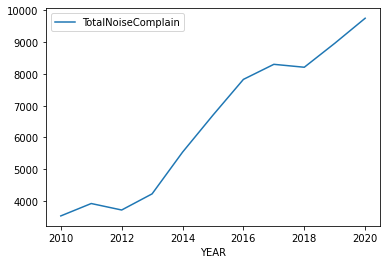

In [69]:
Noise.plot()